In [65]:
# Importing Libraries
from matplotlib import cm  # color map
from mpl_toolkits.mplot3d import Axes3D #3d plot
import math
import matplotlib.pyplot as plt #matplotlib
import numpy as np
from scipy import stats
from scipy.stats import norm
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


## Question No. 1(a)

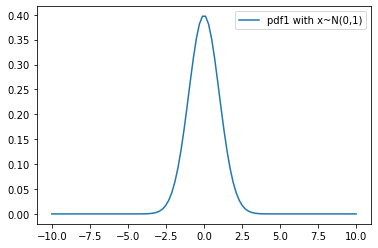

<Figure size 432x432 with 0 Axes>

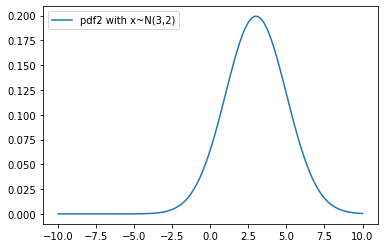

In [66]:
x = np.linspace(-10,10,100)

#plotting pdf for x~N(0,1)
mean1 = 0
std1 = 1
pdf1 = stats.norm.pdf(x,mean1,std1)

# ploting pdf for x~N(3,2)

mean2 = 3
std2 =2
pdf2 = stats.norm.pdf(x,mean2,std2)

# plotting figure for two pdf 
fig = plt.figure()
fig = plt.figure(figsize=(6, 6))   # give figure size 

#plot for pdf1
plt.figure(1)
plt.plot(x,pdf1, label = 'pdf1 with x~N(0,1)')
plt.legend()

# plot for pdf2
fig,ax=plt.subplots(1,1)
plt.plot(x,pdf2, label = 'pdf2 with x~N(3,2)')
plt.legend()
plt.show()

#difference in plot 
# due to difference in mean the second curve is shifted from first curve 
# here standard deviation means spred across mean 
# in first plot we see that spread of this across mean  is less as compare to second curve

## Question No. 1(b)

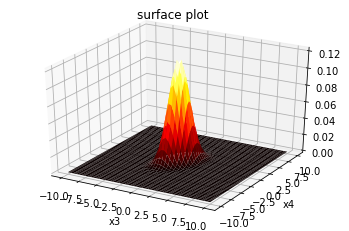

<Figure size 504x864 with 0 Axes>

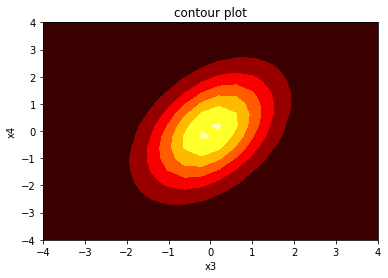

In [67]:
x1 = np.linspace(-10,10)
x2 = np.linspace(-10,10)
x3,x4 = np.meshgrid(x1,x2)  

mean = np.array([0,0])
cov = np.array([ [1 , 0.6] , [0.6 , 2] ])  # matrix for covarience
cov_det = np.linalg.det(cov)  # to take determinate of covarience matrix
cov_inv = np.linalg.inv(cov)  # to take inverse of covarience matrix
N = 1/( np.sqrt((2*np.pi)**2*( cov_det)))

def func(x1, x2):    #defining a function for opertion
    new = ((x1*cov_inv[0][0] + x2*cov_inv[1][0])*x1 + (x1*cov_inv[0][1] + x2*cov_inv[1][1])*x2)
    #new = here we take simply (x)transpose*cov_inv*(x) by matrix multiplication
    # here [0][0],[0][1],[1][0],[1][1] are matrix indices of cov_inv
    new1 = (np.exp(-new/2))*N
    return new1 

# 3d plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
fig = plt.figure(figsize=(7, 12))

#surface plot
plt.figure(1)
ax.plot_surface(x3, x4, func(x3,x4), cmap=cm.hot)
plt.title("surface plot ")
plt.xlabel("x3")
plt.ylabel("x4")

#Contour plot 
fig,ax=plt.subplots(1,1)
cset = ax.contourf(x3, x4, func(x3,x4), cmap=cm.hot)
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.title("contour plot")
plt.xlabel("x3")
plt.ylabel("x4")
plt.show()

## Question No. 2

In [68]:
# reading the CSV file 
csvFile = pd.read_csv('C:/Users/vikas/OneDrive/Desktop/iris.csv', header = None )  
# displaying the contents of the CSV file 
df1 = csvFile.rename(columns = {0:'sepal_length' ,1:'sepal_width',2:'petal_length',3:'petal_width',4:'class'})
print(df1.sort_values('class', axis = 0))


# defining each class and features for indiviual calculation purpose
y1 = df1['class'][:50]  # taking class 1 separately
X1 = df1[['sepal_length','sepal_width', 'petal_length', 'petal_width' ]][:50] #acc to class taking features
# taking 70% train set and 30 test size seperatley with the help of train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30, random_state = 0)

y2 = df1['class'][50:100]
X2 = df1[['sepal_length','sepal_width', 'petal_length', 'petal_width' ]][50:100]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30, random_state = 0)

y3 = df1['class'][100:]
X3 = df1[['sepal_length','sepal_width', 'petal_length', 'petal_width' ]][100:]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.30, random_state = 0)

# make tarin set to array for easily adding them and make a single train set in which only 70% 
# of each class taking 
X1_train = X1_train.to_numpy()     # make array
X2_train = X2_train.to_numpy()
X3_train = X3_train.to_numpy()
X_train = np.concatenate((np.concatenate((X1_train, X2_train), axis = 0), X3_train), axis = 0)
print(" traning set of features values after taking 70% of each features are : \n ",X_train)

y1_train = y1_train.to_numpy()
y2_train = y2_train.to_numpy()
y3_train = y3_train.to_numpy()
y_train = np.concatenate((np.concatenate((y1_train, y2_train), axis = 0), y3_train), axis = 0)
print("traning set of class after taking 70% of each class are : \n ",y_train)

X1_test = X1_test.to_numpy()
X2_test = X2_test.to_numpy()
X3_test = X3_test.to_numpy()
X_test =  np.concatenate((np.concatenate((X1_test, X2_test), axis = 0), X3_test), axis = 0)
print("test sample of features values after taking 30% of each features are : \n ",X_test)

y1_test = y1_test.to_numpy()
y2_test = y2_test.to_numpy()
y3_test = y3_test.to_numpy()
y_test = np.concatenate((np.concatenate((y1_test, y2_test), axis = 0), y3_test), axis = 0)
print("test sample of class after taking 30% of each class for accuracy calculation are : \n ",y_test)

# defining clasifier for calculation purpose
classifier = GaussianNB()
classifier.fit(X_train, y_train)   # fit our train set of features and class into classifier
y_preticted = classifier.predict(X_test)  # now taking prediction on our test set
new = accuracy_score(y_test, y_preticted)   # calculating accuracy between y_test and our predicted y
print("accuracy of our prediction and test sample are : \n ",new)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
27            5.2          3.5           1.5          0.2     Iris-setosa
28            5.2          3.4           1.4          0.2     Iris-setosa
29            4.7          3.2           1.6          0.2     Iris-setosa
30            4.8          3.1           1.6          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
119           6.0          2.2           5.0          1.5  Iris-virginica
120           6.9          3.2           5.7          2.3  Iris-virginica
121           5.6          2.8           4.9          2.0  Iris-virginica
111           6.4          2.7           5.3          1.9  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
 traning set of features values after taking 70% of each features are : 
  [[5.  3.4 1.5

CONFUSION MATRIX : 
 [[15  0  0]
 [ 0 12  1]
 [ 0  3 14]]
CLASSIFICATION REPORT : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.93      0.82      0.87        17

       accuracy                           0.91        45
      macro avg       0.91      0.92      0.91        45
   weighted avg       0.92      0.91      0.91        45

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.8        0.2       ]
 [0.         0.06666667 0.93333333]]


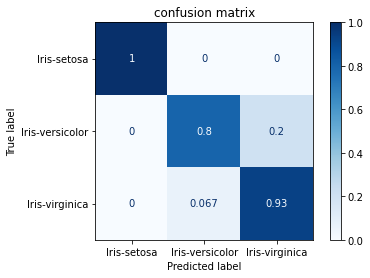

In [69]:
                                          # CONFUSION MATRIX
 # making confusion matrix on y_test and our predicted_y
print("CONFUSION MATRIX : \n",confusion_matrix(y_preticted, y_test)) 
# making classification matrix for better understanding
print("CLASSIFICATION REPORT : \n ",classification_report(y_preticted, y_test))  

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues, normalize=normalize)
disp.ax_.set_title("confusion matrix")
print(title)
print(disp.confusion_matrix)

plt.show()
